In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Set working directory (modify as needed)
%cd -q "C:\Users\jesse\Documents\Schooling\Willamette-MSDS\1-DATA599-02_Python\Final\CHD_group_project"
#%cd -q "/Users/isaacjohnson/Documents/Scanner Output/School/Willamette/Python/Final Project/CHD_group_project"

In [7]:
# Import the dataset
data = pd.read_csv('data/CDC_for_python.csv')
data = cdc.loc[cdc.CHD > 0]

The Elbow Method graph shows that the sum of squared distances starts to decrease more slowly after 3 clusters, and even more so after 4 clusters. This suggests that either 3 or 4 clusters could be a good choice for our k-means algorithm. 

Since the "elbow" in the plot isn't very pronounced, the optimal number of clusters isn't very clear. However, based on the graph, we could proceed with 3 or 4 clusters. Which would you prefer?

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

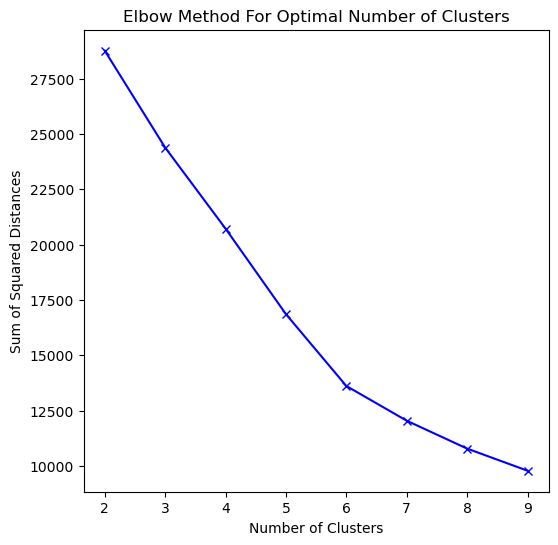

In [8]:
# Import the necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract the columns we're interested in
data_cluster = data[['UrbanRural', 'HighBP', 'HighChol', 'Stroke', 'Age65Plus', 'Poverty', 'Smoker', 'bpmUse', 'SNAPrecipients']]

# Encode the 'UrbanRural' column
data_cluster = pd.get_dummies(data_cluster, columns=['UrbanRural'], drop_first=True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Calculate the sum of squared distances for different numbers of clusters to find the elbow point
ssd = []
range_n_clusters = list(range(2,10))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_scaled)
    ssd.append(kmeans.inertia_)

# Plot the SSDs for each number of clusters
plt.figure(figsize=(6, 6))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [9]:
# Let's perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataframe
data_cluster['Cluster'] = clusters

# Display the first few rows of the dataframe
data_cluster.head()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,HighBP,HighChol,Stroke,Age65Plus,Poverty,Smoker,bpmUse,SNAPrecipients,UrbanRural_1,UrbanRural_2,UrbanRural_3,UrbanRural_4,Cluster
0,34.1,31.2,3.1,11.2,15.1,18.5,67.0,2.6,0,0,0,1,3
1,30.3,30.3,2.3,7.5,8.1,16.7,63.2,1.4,0,0,0,1,0
2,28.8,29.4,2.5,11.1,8.3,15.7,64.0,9.7,0,0,1,0,0
3,36.2,28.7,5.1,7.4,25.3,34.0,64.1,37.7,0,0,0,1,1
4,33.6,32.3,3.7,11.6,10.7,17.8,68.6,6.5,0,0,0,1,3


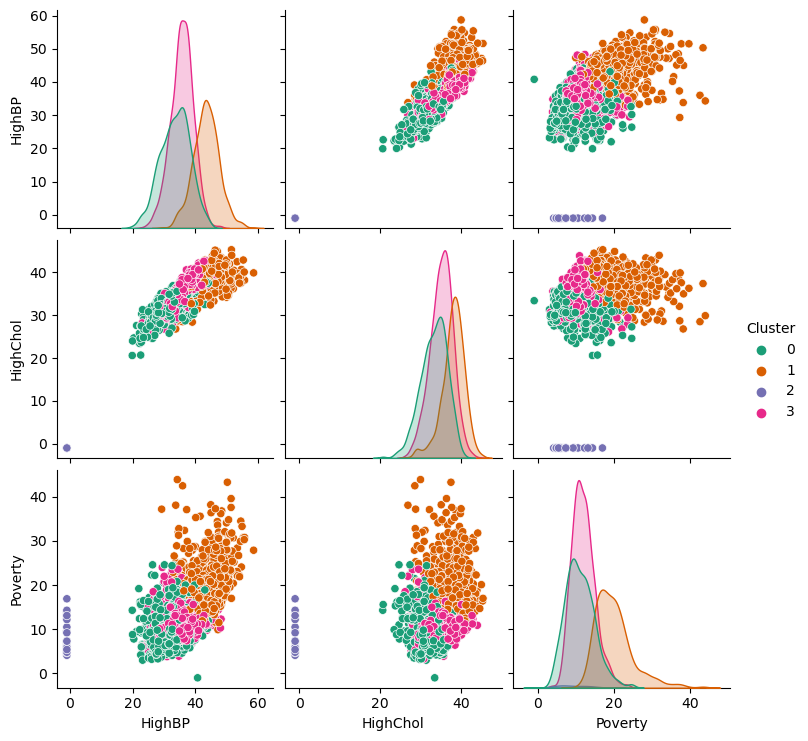

In [10]:
# Import necessary libraries
import seaborn as sns

# Select a few features to plot. Let's pick 'HighBP', 'HighChol', and 'Poverty' for demonstration
features_to_plot = ['HighBP', 'HighChol', 'Poverty']

# Create pairplot colored by cluster
sns.pairplot(data_cluster, vars=features_to_plot, hue='Cluster', palette='Dark2')

# Display the plot
plt.show()
